In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

In [6]:

def build_graph(edges,weights):
    G = nx.Graph()
    for i, e in enumerate(edges):
        G.add_edge(*e, weight=weights[i])
    return G
def generate_edges(G):
    edges = []
    for node in G:
        for neighbour in G[node]:
            edges.append((node, neighbour))
            edges.append((neighbour, node))

    return edges
def generate_weights(G):
    weights = []
    for node in G:
        for neighbour  in G[node]:
            weights.append(G[node][neighbour]["weight"])
            weights.append(G[node][neighbour]["weight"])

    return weights

In [10]:
def generate_tsp_path(G, origin):
    tour = []
    nodes_visited = []
    actual_node = origin
    while(len(nodes_visited) < G.number_of_nodes()):
        min_distance = float('inf')
        for n in G.neighbors(actual_node):
            if G[actual_node][n]['weight'] < min_distance and n not in nodes_visited or len(nodes_visited) == G.number_of_nodes() - 1 and n == origin:
                min_distance = G[actual_node][n]['weight']
                next_node = n
                next_edge = (actual_node,next_node)
        nodes_visited.append(actual_node)
        tour.append(next_edge)
        actual_node = next_node
    
    return tour
    #return [(1,2),(2,3),(3,4),(4,5)] # example


In [11]:
def get_drawing_config(path, edges):
    edges_config = [(4,'g') if n in path else (1,'b') for n in edges]
    edges_config = np.array(edges_config)
    edges_weights = list(edges_config[:,0])
    edges_colors = list(edges_config[:,1])
    edges_labels = nx.get_edge_attributes(G,'weight')
    return (edges_weights, edges_colors, edges_labels)

[(6, 1), (1, 4), (4, 2), (2, 3), (3, 5), (3, 5)]


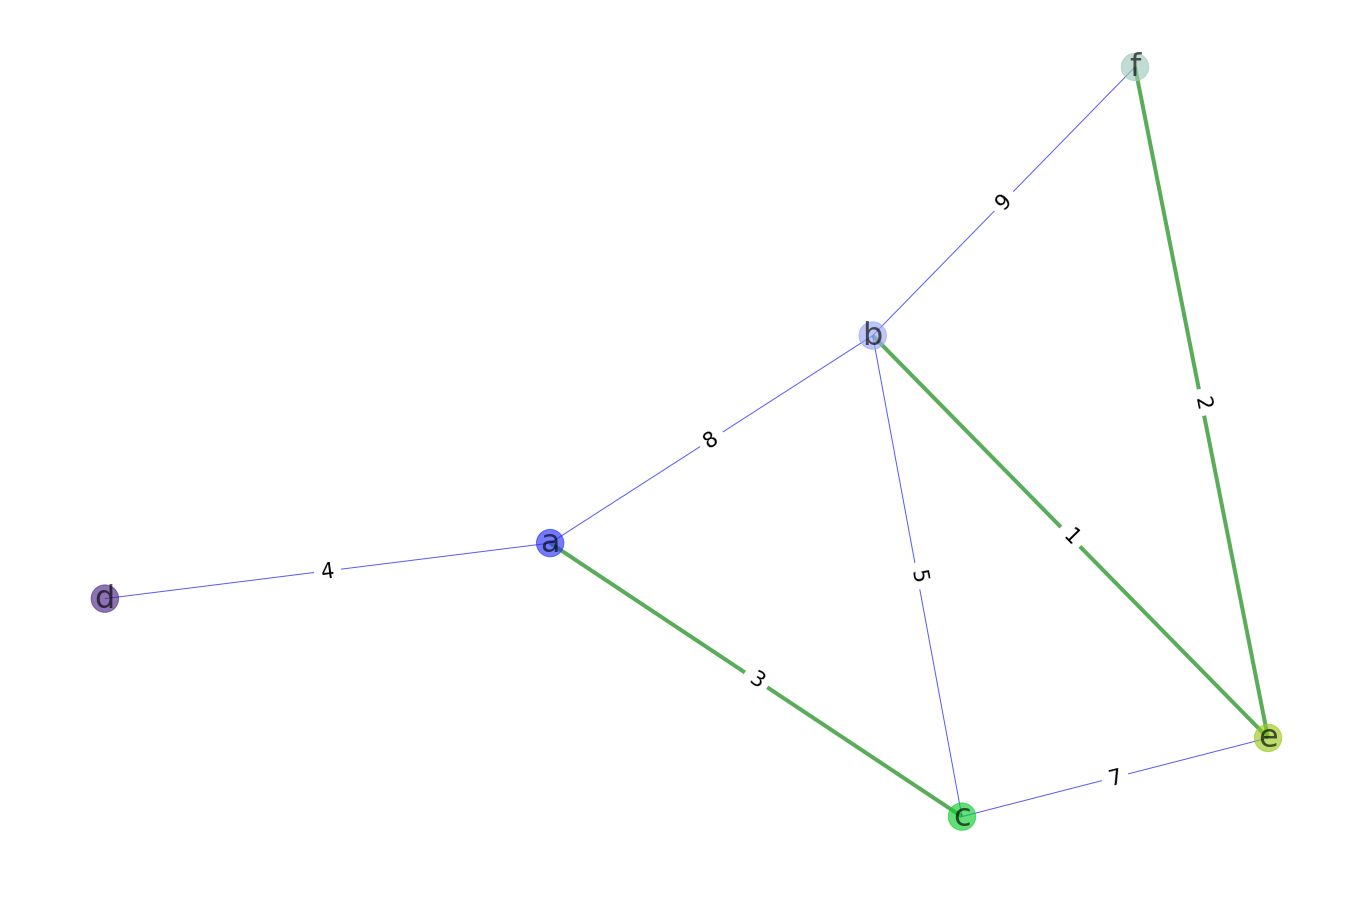

In [14]:
def random_colors(number_of_colors):
    colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
    return colors

if __name__ == "__main__":

    # graph construction
    #edges = [(1,2),(1,3),(1,4),(1,6),(2,3),(2,4),(2,5),(3,4),(3,5),(3,6),(4,5),(5,6),(4,6)] # example1
    edges = [(1,2),(1,4),(1,6), (2,3), (2,4), (2,5), (3,4), (3,5)]
    #weights = np.random.randint(low=1,high=12,size=len(edges))
    #weights = [2,5, 3, 7, 5, 1, 5, 2,3, 7, 2, 2, 1] #example1
    weights = [8, 3, 4, 1, 5, 9, 7, 2]
    G = build_graph(edges,weights)
    #edges1 = generate_edges(G)
    #weights1 = generate_weights(G)
    #print(edges1)
    # tsp solving
    path = generate_tsp_path(G,6)
    print(path)
    
    # drawing config
    #edges1 = [(1,2),(2,1),(1,3),(3,1),(1,4),(4,1),(1,6),(6,1),(2,3),(2,3),(2,4),(4,2),(2,5),(5,2),(3,4),(4,3),(3,5),(5,3),(3,6),(6,3),(4,5),(5,4),(5,6),(6,5),(4,6),(6,4)]
    #weights = [2, 2, 5, 5, 3, 3, 7, 7, 5, 5, 1, 1, 5, 5, 2, 2, 3, 3, 7, 7, 2, 2, 2, 2, 1, 1]
    edge_weights, edge_colors, edge_labels = get_drawing_config(path,edges)
    pos = nx.spring_layout(G, k=G.number_of_nodes()/len(edges))
    node_mapping = dict(zip(G.nodes(),"abcdefg")) # example
    node_colors = random_colors(G.number_of_nodes())

    # graph plotting
    plt.figure(1,figsize=(18,12))
    nx.draw(G,pos, size=len(G.edges), labels=node_mapping, font_size=32, node_size=750,
     node_color=node_colors, alpha=0.65, edge_color='b')
    nx.draw_networkx_edge_labels(G,pos,font_size=21 , edge_labels=edge_labels)
    plt.savefig('graph.png')
    plt.close()


    plt.figure(2,figsize=(18,12))
    nx.draw(G,pos, size=len(G.edges), labels=node_mapping, font_size=32, node_size=750,
     node_color=node_colors, alpha=0.65, width=edge_weights, edge_color=edge_colors)
    nx.draw_networkx_edge_labels(G,pos,font_size=21 , edge_labels=edge_labels)
    plt.savefig('solution.png')

    plt.show()